In [1]:
from matplotlib import pyplot as plt
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn import neighbors
from imblearn.over_sampling import SMOTENC
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from collections import Counter
from sklearn import ensemble
from sklearn import metrics
from sklearn import linear_model
import numpy as np
import pandas as pd
import seaborn as sns

# Functions that will be used later for reducing the written code
def model(mod, X, Y):
    #Data split to Train and test
    global X_train, X_test, y_train, y_test
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=1)
    model_object=mod
    model_object.fit(X_train, y_train)
    evaluation(model_object)
    return model_object

def evaluation(model_object):
    #Evalution of model
    score=cross_val_score(X=X_test, y=y_test, estimator=model_object, cv=10)
    print("Accuracy: %0.2f (+/- %0.2f)\n" % (score.mean(), score.std() * 2))
    pos_label=None
    y_pred=pd.Series(model_object.predict(X_test))
    
    #Plotting the ROC-AUC curve   
    if ((len(np.unique(y_test)) > 2)):
        pos_label=2
    fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred, pos_label=pos_label)
    roc_auc = metrics.auc(fpr, tpr)
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', linewidth=4,label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right', fancybox=True, fontsize='large')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.title('Receiver Operating Characteristic')
    
    fpr=fpr[1]
    tpr=tpr[1]
    print ('The sensitivity i.e true positives is {0:2f}% '.format(tpr*100))
    print ('The specificity i.e true negatives is {0:2f}% '.format((1-fpr)*100))
    print ('The Type I error i.e. false negatives is {0:2f}% '.format((1-tpr)*100))
    print ('The Type II error i.e. false positives is {0:2f}% '.format(fpr*100))
    return

%matplotlib inline
sns.set(rc={'figure.figsize':(12,7)}, style='whitegrid', color_codes=True)

/Users/Sri/anaconda3/lib/python3.6/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [2]:
df=pd.read_csv('breast-cancer-wisconsin.data', header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


1. Sample code number: id number 
2. Clump Thickness: 1 - 10 
3. Uniformity of Cell Size: 1 - 10 
4. Uniformity of Cell Shape: 1 - 10 
5. Marginal Adhesion: 1 - 10 
6. Single Epithelial Cell Size: 1 - 10 
7. Bare Nuclei: 1 - 10 
8. Bland Chromatin: 1 - 10 
9. Normal Nucleoli: 1 - 10 
10. Mitoses: 1 - 10 
11. Class: (2 for benign, 4 for malignant)

In [3]:
df.columns=['Sample code number','Clump Thicknes','Uniformity of Cell Size',
            'Uniformity of Cell Shape', 'Marginal Adhesion', 'Single Epithelial Cell Size','Bare Nuclei',
            'Bland Chromatin', 'Normal Nucleoli','Mitoses','Class' ]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
Sample code number             699 non-null int64
Clump Thicknes                 699 non-null int64
Uniformity of Cell Size        699 non-null int64
Uniformity of Cell Shape       699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null object
Bland Chromatin                699 non-null int64
Normal Nucleoli                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.1+ KB


One of the column 'Bare Nuclei' is an object need to convert it into int64 for proper analysis

In [5]:
df['Bare Nuclei'].value_counts()

1     402
10    132
5      30
2      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: Bare Nuclei, dtype: int64

Need to replace the '?' with nan and then delete the rows since it is very small fraction of the total data.

In [6]:
df['Bare Nuclei'].replace('?', np.nan, inplace=True)
df.dropna(inplace=True, axis=0)
df['Bare Nuclei'] = pd.to_numeric(df['Bare Nuclei'])
df.reset_index(drop=True, inplace=True)
df.isnull().sum()

Sample code number             0
Clump Thicknes                 0
Uniformity of Cell Size        0
Uniformity of Cell Shape       0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Bland Chromatin                0
Normal Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

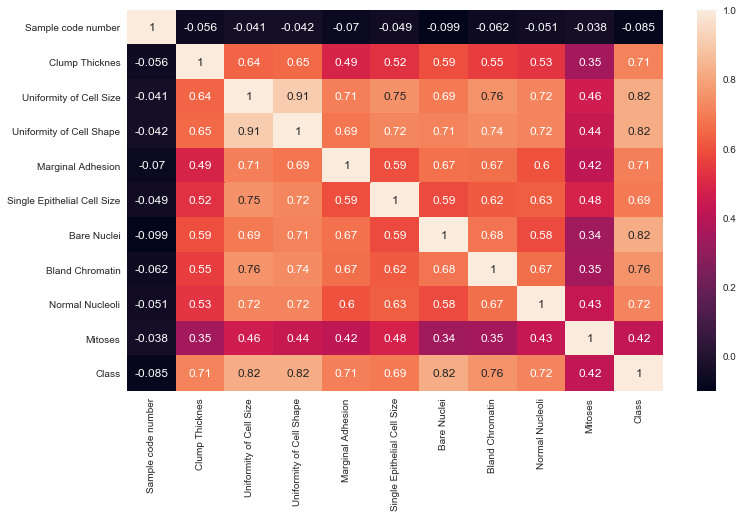

In [7]:
#Heat map
sns.heatmap(df.corr(), annot=True)
plt.show()

Shows lot of correlations between variables and Outcome variable i.e Class

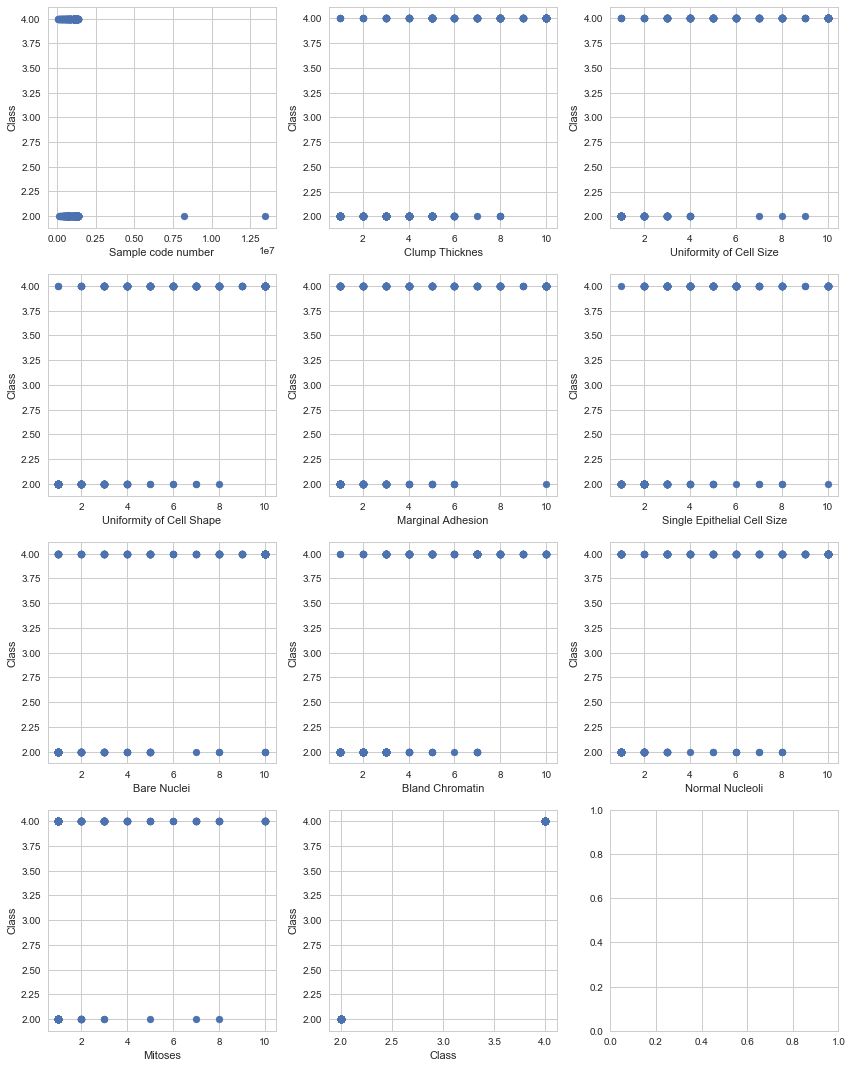

In [8]:
# Scatter plot to see the spread of the X variables in relation to outcome variable Y
num_datatype=df.select_dtypes(include=["number"])
x=y=0
fig, axes =plt.subplots(4,3)
fig.set_size_inches(12, 15)
for i in range(0, num_datatype.shape[1]):  
    axes[x,y].scatter(num_datatype.iloc[:, i], num_datatype['Class'])
    axes[x,y].set(xlabel=num_datatype.columns[i], ylabel='Class')
    plt.tight_layout()
    y+=1
    if (y==3):
        x+=1
        y=0
plt.show()

In [9]:
df.head()

,Sample code number,Clump Thicknes,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [10]:
# Creating binary variables for outcome variable

# 0 means benign and 1 means Cancer or malignant

df['Class'] = np.where(df['Class'] == 2, 0, 1)

In [11]:
Y=df['Class']
#Removing Code number from X variables since it has no correlation to Y and is just an id number
X=df.loc[:, ~(df.columns).isin(['Class', 'Sample code number'])]


In [12]:
# Creating Dummy variables for Categorical variables
X=X.astype('object')
X=pd.get_dummies(X)

In [13]:
Y.value_counts()

0    444
1    239
Name: Class, dtype: int64

As seen from above there is a problem of Class imbalance here which can give rise to false +ve or false -ve errors

In [14]:
# SMOTE i.e oversampling and undersampling
# Storing the column names as we are generating numpy arrays which dont have labels
col_names=X.columns
smote_nc = SMOTENC(categorical_features=[0], random_state=0)
X, Y = smote_nc.fit_resample(X, Y)
print('Resampled dataset samples per each class\n {}'.format(Counter(Y)))

Resampled dataset samples per each class
 Counter({0: 444, 1: 444})


In [15]:
##############Modelling##########

### kNN Classifier


k here is  1
Accuracy: 0.98 (+/- 0.06)

The sensitivity i.e true positives is 97.297297% 
The specificity i.e true negatives is 97.260274% 
The Type I error i.e. false negatives is 2.702703% 
The Type II error i.e. false positives is 2.739726% 

k here is  2
Accuracy: 0.98 (+/- 0.06)

The sensitivity i.e true positives is 97.297297% 
The specificity i.e true negatives is 97.260274% 
The Type I error i.e. false negatives is 2.702703% 
The Type II error i.e. false positives is 2.739726% 

k here is  3
Accuracy: 0.98 (+/- 0.05)

The sensitivity i.e true positives is 99.324324% 
The specificity i.e true negatives is 97.945205% 
The Type I error i.e. false negatives is 0.675676% 
The Type II error i.e. false positives is 2.054795% 

k here is  4
Accuracy: 0.98 (+/- 0.03)

The sensitivity i.e true positives is 99.324324% 
The specificity i.e true negatives is 97.260274% 
The Type I error i.e. false negatives is 0.675676% 
The Type II error i.e. false positives is 2.739726% 

k here is  5
Ac

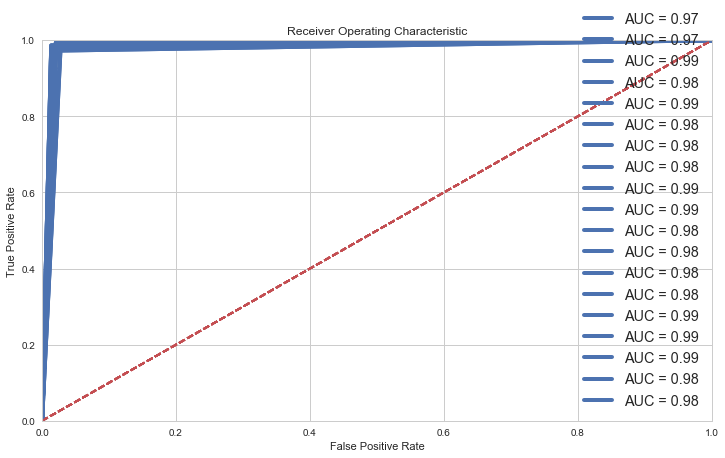

In [16]:
for n in range(1,20):
    print ('\nk here is ', n)
    a=model(neighbors.KNeighborsClassifier(n_neighbors=n, weights='distance'), X, Y)
    

Here k at 15 shows the highest accuracy and also lower error compared to other k values

### Random Forest Classifier

/Users/Sri/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Accuracy: 0.96 (+/- 0.04)

The sensitivity i.e true positives is 96.621622% 
The specificity i.e true negatives is 97.945205% 
The Type I error i.e. false negatives is 3.378378% 
The Type II error i.e. false positives is 2.054795% 


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

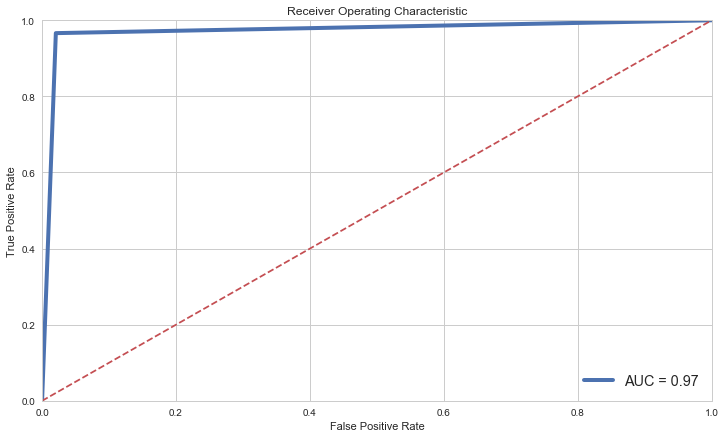

In [17]:
model(ensemble.RandomForestClassifier(), X, Y)

### Gradient Boost Classifier

Accuracy: 0.96 (+/- 0.08)

The sensitivity i.e true positives is 97.297297% 
The specificity i.e true negatives is 95.890411% 
The Type I error i.e. false negatives is 2.702703% 
The Type II error i.e. false positives is 4.109589% 


GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.01, loss='deviance', max_depth=2,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=500,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

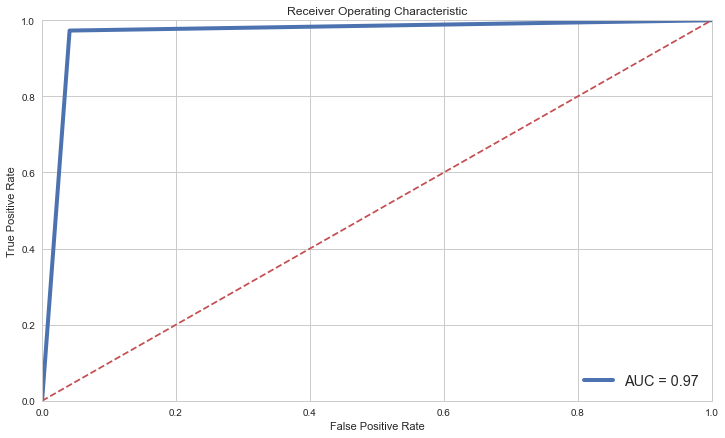

In [18]:
params = {'n_estimators': 500,
          'max_depth': 2,
           'learning_rate': 0.01,
          'loss': 'deviance'}
model(ensemble.GradientBoostingClassifier(**params), X, Y)

Accuracy: 0.96 (+/- 0.08)

The sensitivity i.e true positives is 97.297297% 
The specificity i.e true negatives is 95.890411% 
The Type I error i.e. false negatives is 2.702703% 
The Type II error i.e. false positives is 4.109589% 


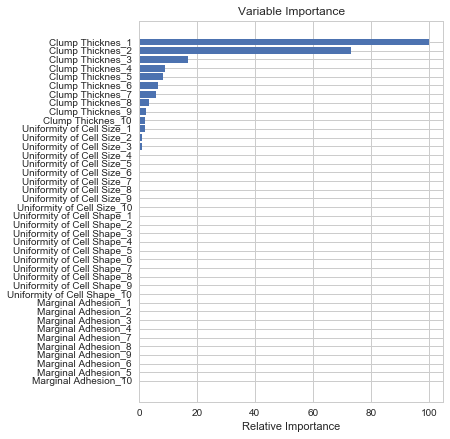

In [19]:
mo=model(ensemble.GradientBoostingClassifier(**params), X, Y)
feature_importance = mo.feature_importances_
# Make importances relative to max importance.
feature_importance = 100.0 * (feature_importance / feature_importance.max())
fea_imp=np.array(sorted(list(feature_importance), reverse=True)[0:40])
sorted_idx = np.argsort(fea_imp)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, fea_imp[sorted_idx], align='center')
plt.yticks(pos, col_names[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

From this we can do explanatory trends of variance. Clump thickness explains majority of the variance among features for cancer prediction. Next is 'Uniformity of Cell size/shape' and 'Marginal Adhesion'.

### Support Vector Machine

Accuracy: 0.97 (+/- 0.05)

The sensitivity i.e true positives is 98.648649% 
The specificity i.e true negatives is 98.630137% 
The Type I error i.e. false negatives is 1.351351% 
The Type II error i.e. false positives is 1.369863% 


SVC(C=1000000000.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

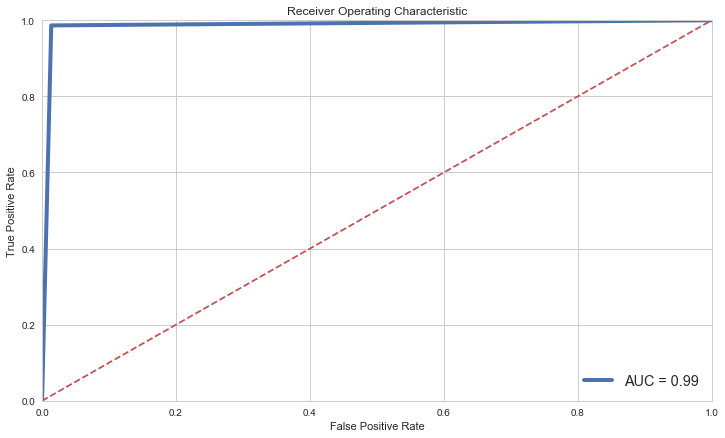

In [20]:
#Changing the kernel from 'rbfs' to 'linear' increased accuracy and decreased error rates.
model(SVC(C=1e9, kernel='linear'), X, Y)

### Vanilla Logistic Regression

Accuracy: 0.97 (+/- 0.04)

The sensitivity i.e true positives is 98.648649% 
The specificity i.e true negatives is 98.630137% 
The Type I error i.e. false negatives is 1.351351% 
The Type II error i.e. false positives is 1.369863% 


LogisticRegression(C=1000000000.0, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

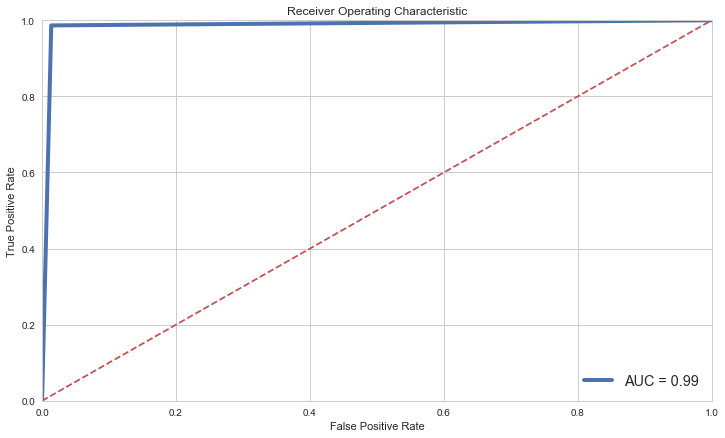

In [21]:
model(LogisticRegression(C=1e9, solver='liblinear'), X, Y)

Logistic Regression and SVC both have the lowest amount of error compared to other models and also the highest accuracy. Therefore these two models with the above parameters tuned can be used  for cancer diagnosis in predicting cancer from the above parameters